<a href="https://colab.research.google.com/github/Aishwarya138/Synapse-Learning-period/blob/week2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [2]:
# import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [3]:
housing_data = pd.read_csv("/content/gdrive/MyDrive/synapse_w2/housing_data.csv")

housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**"info()" method to check the data types and number**

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [5]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [6]:
for col in housing_data.columns:
    print(col)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

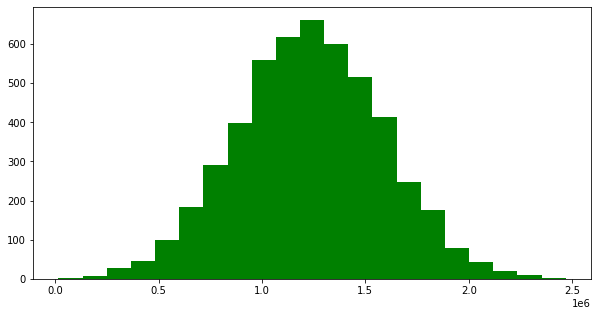

In [7]:
fig = plt.figure(figsize =(10, 5))
plt.hist(housing_data["Price"], bins = 21, color = "g")

plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [8]:
housing_data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [9]:
column_names_list_1 = []     ## list of data frame column names

for col in housing_data.columns:
    column_names_list_1.append(col)
 

In [10]:
selected_columns = housing_data[["Avg. Area Income", "Avg. Area House Age", 
                                 "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]]

X = selected_columns.copy()   ##  dataframe containing all the numerical training features

In [11]:
y = pd.DataFrame(housing_data["Price"])   ## dataframe containing the target (Price)

In [12]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape, y.shape)

(5000, 5) (5000, 1)


In [13]:
# print a few record of X
X.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [14]:
# print a few record of y
y.head(3)

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06


### Test-train split

**Import train_test_split function from scikit-learn**

In [15]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [17]:
print("X_train size = ", X_train.size, "    ", "X_train shape = ", X_train.shape)
print("X_test size = ", X_test.size, "      ", "X_test shape = ", X_test.shape)
print("y_train size = ", y_train.size, "     ", "y_train shape = ", y_train.shape)
print("y_test size = ", y_test.size, "      ", "y_test shape = ", y_test.shape)

X_train size =  17500      X_train shape =  (3500, 5)
X_test size =  7500        X_test shape =  (1500, 5)
y_train size =  3500       y_train shape =  (3500, 1)
y_test size =  1500        y_test shape =  (1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [18]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a Linear Regression object "lm" by calling LinearRegression()
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [20]:
predictions = lm.predict(X_test)

print(type(predictions))
print(predictions.size)

<class 'numpy.ndarray'>
1500


**Since we"re done with our predictions, let"s compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

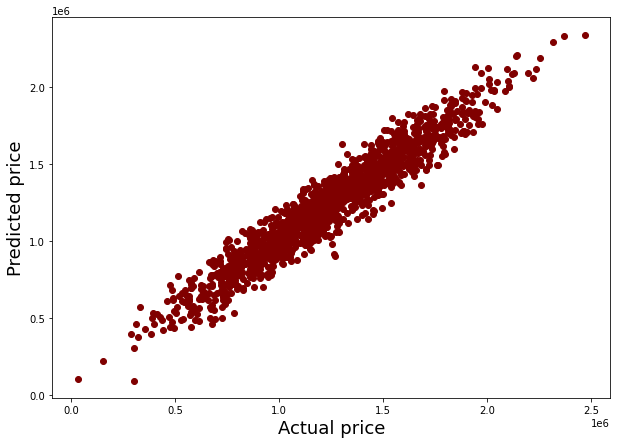

In [21]:
plt.figure(figsize=(10,7))

plt.xlabel("Actual price",fontsize=18)
plt.ylabel("Predicted price", fontsize=18)
plt.scatter(x = y_test, y = predictions, color="maroon")

plt.show()

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [22]:
from sklearn.metrics import r2_score

round(r2_score(y_test, predictions), 3)

0.92

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [23]:
# import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [24]:
df = pd.read_csv("/content/gdrive/MyDrive/synapse_w2/classified_data.txt", index_col = 0)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**"info()" method to check the data types and number**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [26]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [27]:
column_names_list_2 = []

for col in df.columns:
    column_names_list_2.append(col)

**Run a "for" loop to draw boxplots of all the features for "0" and "1" TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

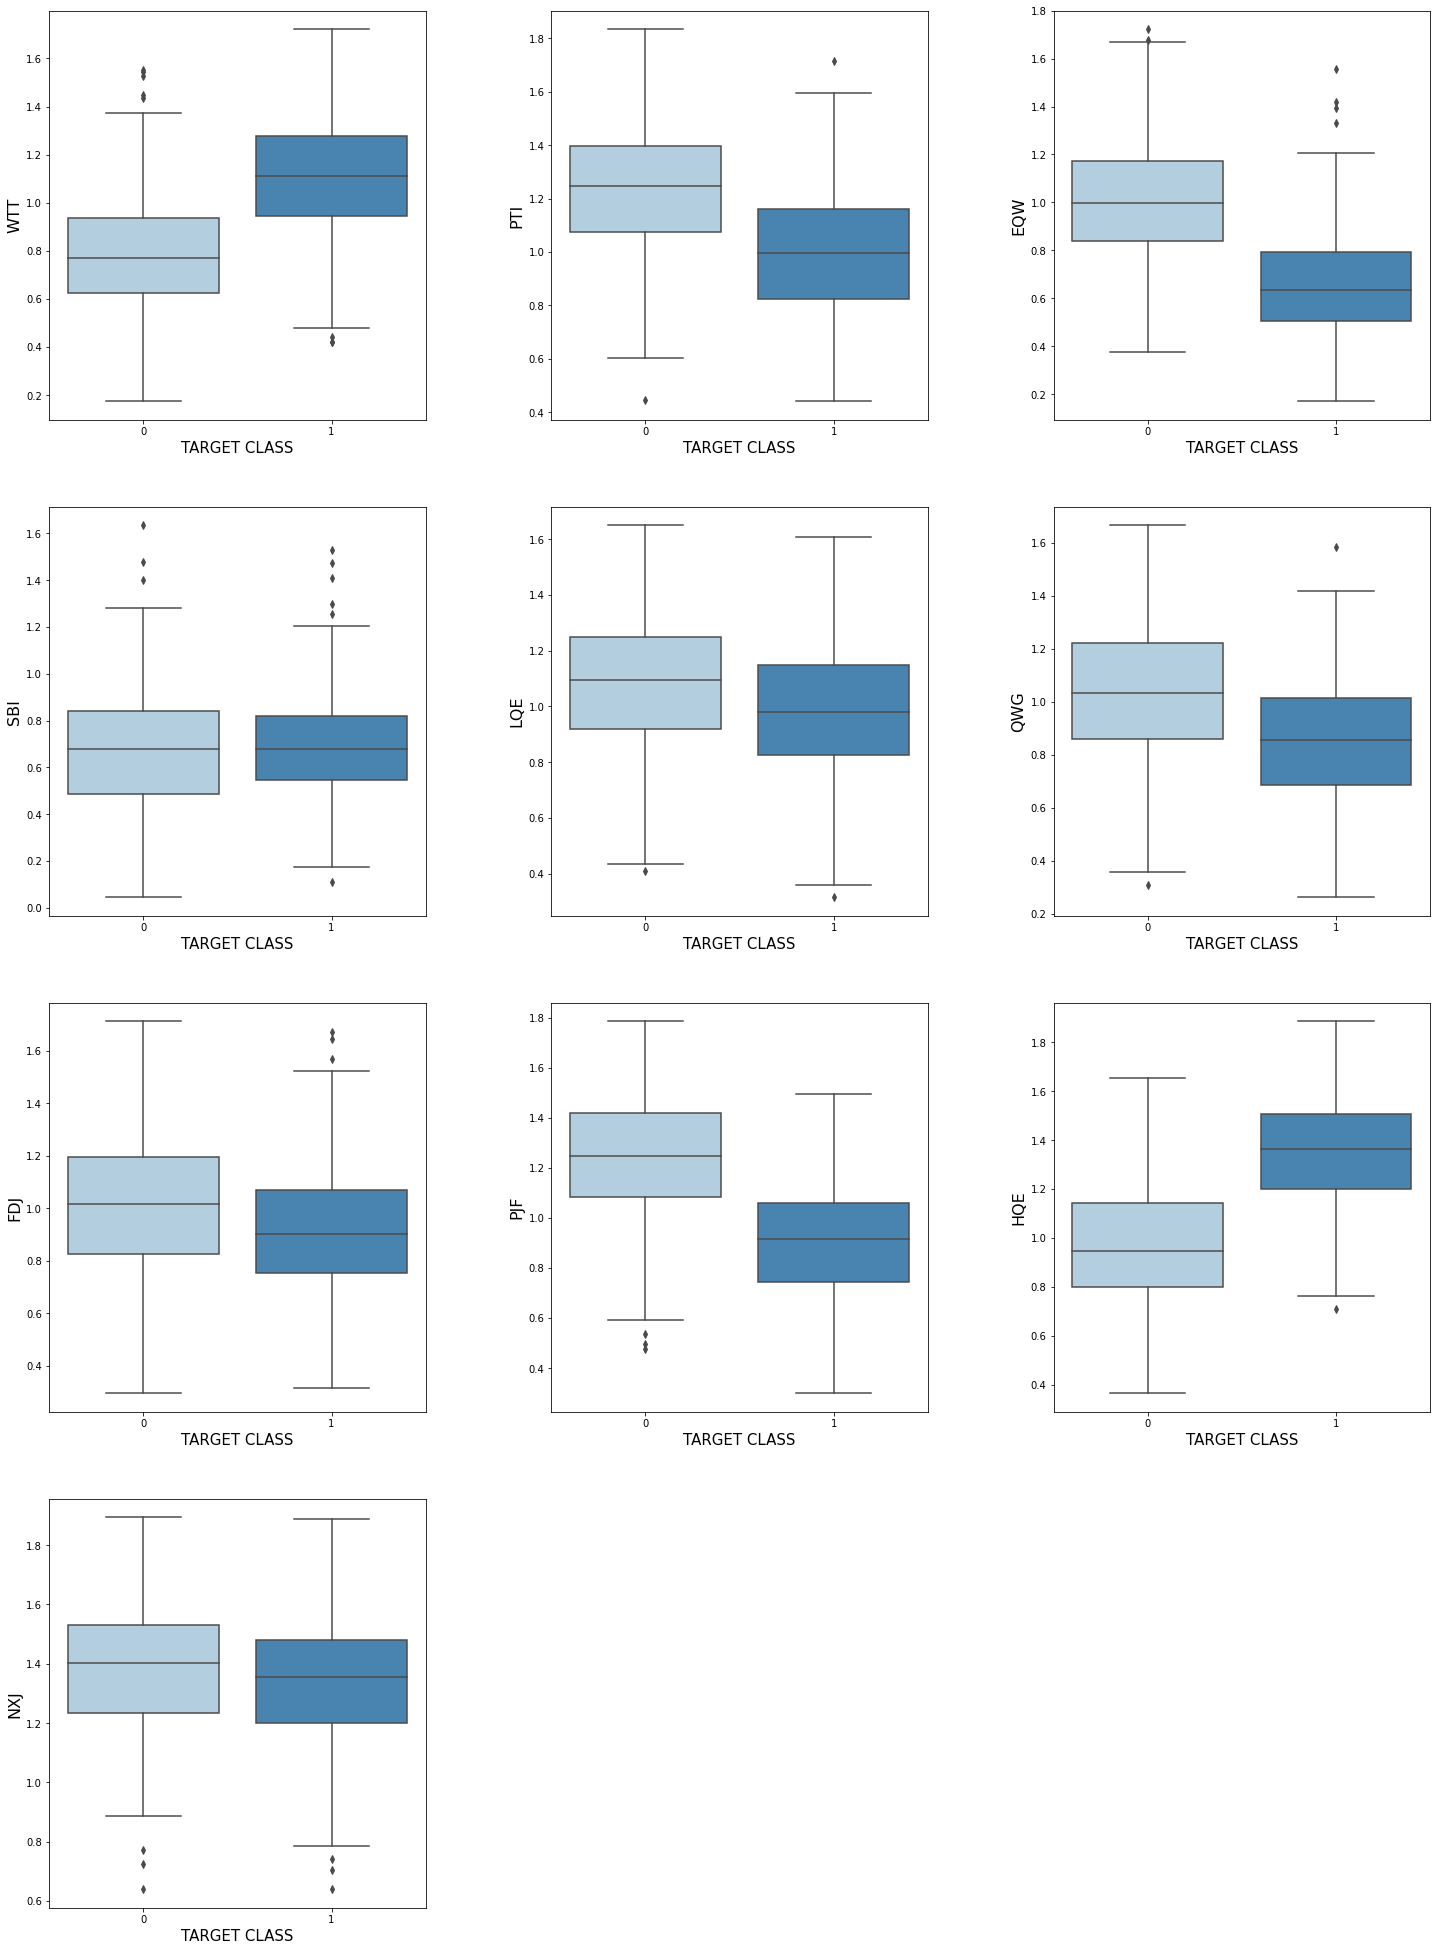

In [28]:
column_list = ["WTT",	"PTI", "EQW",	"SBI",	"LQE",	"QWG", "FDJ",	"PJF",	"HQE",	"NXJ"]

r = 4  ## number of rows
c = 3   ## number of columns
i = 1   ## counter

fig = plt.figure(figsize=(10,15))

for l in column_list:
    plt.subplot(r, c, i)
    plt.xlabel("TARGET CLASS", size = 15)
    plt.ylabel("l", size = 16)
    sns.boxplot(x = df["TARGET CLASS"], y = df[l], palette="Blues")
    i += 1

plt.tight_layout()
plt.subplots_adjust(top=1.8, right = 2)
plt.show() 

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [30]:
features_to_scale = df.copy()
features_to_scale.drop(["TARGET CLASS"], inplace = True, axis = 1)

In [31]:
Fit = scaler.fit(features_to_scale)

scaled = Fit.transform(features_to_scale)

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [32]:
df_feat = pd.DataFrame(scaled, columns = column_list)

df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [33]:
X = df_feat
y = df["TARGET CLASS"]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [36]:
pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [39]:
def calculate_accuracy(y_test, pred):
    tp = sum((y_test == 1) & (pred == 1))     ## true positive
    tn = sum((y_test == 0) & (pred == 0))     ## true negative
    fp = sum((y_test == 0) & (pred == 1))     ## false positive
    fn = sum((y_test == 1) & (pred == 0))     ## false negative

    accuracy = (tp + tn)/(tp + tn + fp + fn) * 100

    return (accuracy)

print("Accuracy = ", round(calculate_accuracy(y_test, pred), 3))

Accuracy =  93.667


### Choosing optimal "k"

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [40]:
accuracy_list = []

for i in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

    accuracy_list.append(calculate_accuracy(y_test, pred))

**Plot a graph of K value vs Accuracy**

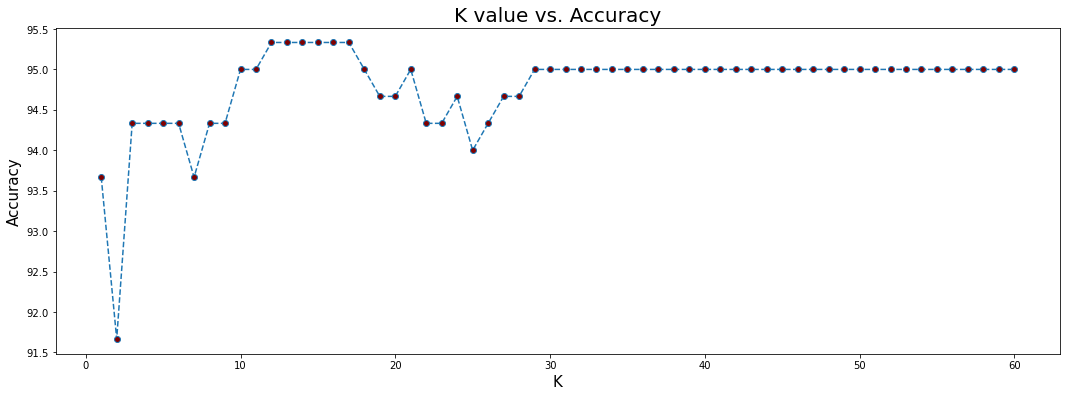

In [41]:
plt.figure(figsize = (18,6))

plt.plot(range(1, 61), accuracy_list, linestyle = "dashed", marker = "o", markerfacecolor = "maroon", markersize = "6")
plt.title("K value vs. Accuracy", size = 20)
plt.xlabel("K", size = 15)
plt.ylabel("Accuracy", size = 15)

plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [42]:
# K = 25 is the best value because after that the accuracy is increasing

knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

calculate_accuracy(y_test, pred)

94.0

# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [43]:
df = pd.read_csv("/content/gdrive/MyDrive/synapse_w2/titanic_data.csv")

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [44]:
def extract_titles(df):
    import re
    title_list = []
    for i in df["Name"]:
        title_search = re.search("(\w+)\.", i)
        if title_search:
            title = title_search.group()
            title_list.append(title)
  
    df["Title"] = title_list
    return df


def scaling_normalization(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[["Fare", "Family_members", "Age"]] = scaler.fit_transform(df[["Fare", "Family_members", "Age"]])     
    return df 
    

def titanic_preprocessing_pipeline(df):

    df = extract_titles(df)          ## extracting titles from names 

    df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)     ## dropping unwanted columns  
                                                        

    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)      ## handling null values
    df["Age"].fillna(np.mean(df["Age"]), inplace = True)  


    df["Family_members"] = df["SibSp"] + df["Parch"]        ## adding features to dataset
    df.drop(["SibSp", "Parch"], axis = 1, inplace = True)     


    df = scaling_normalization(df)         ## normalizing

    df = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])       ## One hot encoding    

    return df
    

In [45]:
X = titanic_preprocessing_pipeline(df) 


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [46]:
y = X["Survived"].copy() 

<b>remove the y_label (survived) from the dataframe</b>

In [47]:
X.drop(["Survived"], axis = 1, inplace = True)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,  y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)

<b>print the test accuracy and train accuracy here</b>

In [73]:
print("Test accuracy : ", accuracy_score(y_train, train_pred))
print("Test accuracy : ", accuracy_score(y_test, y_pred))

Test accuracy :  0.9823434991974318
Test accuracy :  0.7873134328358209


In [74]:
## Hyperparameter tuning using GridSearchCV

params = {
    "criterion":["gini", "entropy"], 
    "splitter":["best", "random"], 
    "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 
    "min_samples_split":[2, 3, 4, 5, 6], 
    "min_samples_leaf":[2, 4, 6, 8,10, None], 
}

In [75]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid = params, cv = 10, n_jobs = -1)

In [76]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [77]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'splitter': 'random'}

In [78]:
grid.best_score_

0.8474398361495135